# Collaboration and Competition

---

In this project, we develop two reinforcement learning agents to collaborate in a table tennis game, so as to keep the ball in the game as long as possible. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

### 0. Install dependencies

Run the next code cell to install a few packages. This line will take a few minutes to run!

In [1]:
!pip -q install ./python

### 1. Setting environment variables

Here we set env_name to the name of the Unity environment file we want to launch. We should ensure that the environment build is in the python directory.

In [2]:
env_name = '...'   # Name of the Unity environment binary to launch
train_mode = True  # Whether to run the environment in training or inference mode

### 2. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [3]:
import sys
import random
import copy
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple, deque

from unityagents import UnityEnvironment

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:56) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


### 3. Start the environment

UnityEnvironment launches and begins communication with the environment when instantiated.

In [4]:
env = UnityEnvironment(file_name=env_name)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 4. Examine the State and Action Spaces

We can reset the environment to be provided with an initial set of observations and states for all the agents within the environment. In ML-Agents, states refer to a vector of variables corresponding to relevant aspects of the environment for an agent. Likewise, observations refer to a set of relevant pixel-wise visuals for an agent.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 5. Take Random Actions in the Environment

Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions.

Once this cell is executed, a message will be printed that detail how much reward was accumulated during one Episode. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [7]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 6. Training the agents

#### 6.1 Training

Now let us train our agents to solve the environment! The ddpg function trains the agent in the given environment.

In [8]:
def ddpg(n_episodes=2500, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scr_list = []
    avg_list = []
    max_score = -np.Inf
    
    for e in range(1, n_episodes+1):
        # Reset environment 
        env_info = env.reset(train_mode=True)[brain_name]
        # Reset agent 
        agent.reset() 
        # Get the initial state 
        states = env_info.vector_observations      
        # Initialize scores for the agents
        scores = np.zeros(num_agents)
        
        for t in range(max_t):
            # Get action
            actions = agent.act(states)
            # Observe reaction (environment)
            env_info = env.step(actions)[brain_name]        
            ## Get new state 
            next_states = env_info.vector_observations
            # Get reward 
            rewards = env_info.rewards
            # See if episode has finished 
            dones = env_info.local_done
            # Step 
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            scores += rewards
            
            if np.any(dones):
                break 
                
        score = np.max(scores)
        max_score = np.maximum(max_score, score)
    
        scores_deque.append(score)
        scr_list.append(score)
        avg_list.append(np.mean(scores_deque))
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tMax score: {:.3f}'.format(e, np.mean(scores_deque), max_score), end="")
        
        if e % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'model_checkpoints/actor_checkpoint.pth')
            for index, critic in enumerate(agent.get_critic()):
                torch.save(critic.state_dict(), 'model_checkpoints/critic_checkpoint_0{0}.pth'.format(index))
        if np.mean(scores_deque) >= .5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'actor_solution.pth')
            for index, critic in enumerate(agent.get_critic()):
                torch.save(critic.state_dict(), 'critic_solution_{0}.pth'.format(index))
            break
    
    return scores, scr_list, avg_list

In [9]:
import torch
from maddpg_agent import MADDPG

# Initialize a DDPG Agent
agent = MADDPG(state_size=state_size, action_size=action_size, n_agents=num_agents, random_seed=1)

# Run the algorithm
scores, scr_list, avg_list = ddpg()

Episode 100	Average Score: 0.00	Max score: 0.000
Episode 200	Average Score: 0.00	Max score: 0.000
Episode 300	Average Score: 0.00	Max score: 0.090
Episode 400	Average Score: 0.01	Max score: 0.100
Episode 500	Average Score: 0.00	Max score: 0.100
Episode 600	Average Score: 0.00	Max score: 0.100
Episode 700	Average Score: 0.00	Max score: 0.100
Episode 800	Average Score: 0.04	Max score: 0.100
Episode 900	Average Score: 0.03	Max score: 0.100
Episode 1000	Average Score: 0.03	Max score: 0.300
Episode 1100	Average Score: 0.07	Max score: 0.500
Episode 1200	Average Score: 0.15	Max score: 2.600
Episode 1260	Average Score: 0.51	Max score: 2.700
Environment solved in 1160 episodes!	Average Score: 0.51


#### 6.2 Watch a trained agent

Watch the performance of a trained agent in this environment.

In [10]:
# load the weights from file
agent.actor_local.load_state_dict(torch.load('actor_solution.pth'))

env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
states = env_info.vector_observations               # get the current state
scores = np.zeros(num_agents)                       # initialize the score
while True:
    action = agent.act(states)                      # select an action
    env_info = env.step(action)[brain_name]         # send the action to the environment
    next_states = env_info.vector_observations      # get the next state
    rewards = env_info.rewards                      # get the reward
    dones = env_info.local_done                     # see if episode has finished
    scores += rewards                               # update the score
    states = next_states                            # roll over the state to next time step
    if np.any(dones):                               # exit loop if episode finished
        break

print("\rEpisode: {0}\tScore: {1}".format(i, np.max(scores)), end='')

Episode: 5	Score: 2.600000038743019

#### 6.3 Close the environment when finished

When we are finished using an environment, we can close it with the function below.

In [11]:
env.close()

### 7. Results

Here we plot the evolution of the score accumulated by our agent, by the number of episodes.

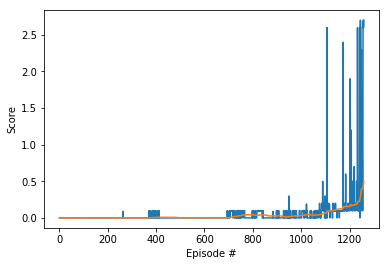

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(scr_list)
plt.plot(avg_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()